 ## 6.4 Supervised Machine Learning: Regression

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### Bonus: performance improvement after removing outliers

### 1. Importing libraries and data

In [7]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import scipy
import scikitplot as skplt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
## Importing Data
path = r"C:\Users\Mafalda\Documents\mafalda\Formação\Data Analytics\CareerFoundry\Data Analytics Program\2.Data Immersion\Achievement 6\Boat Sales Analysis"

In [9]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'boat_data_categories_v1.csv'), index_col = False)

In [10]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.
%matplotlib inline

In [11]:
df.shape

(9893, 14)

In [12]:
df.head()

,Unnamed: 0,Price,Boat Type,Manufacturer,Condition,Boat Age,Year Built,Length,Width,Boat Area (m2),Visits,Material,Country,Visits_categorical
0,0,3537,Motor Yacht,Rigiflex power boats,Used,6.000000,2017,4.00,1.90,7.60,226,Other,Switzerland,Medium
1,1,3490,Center console boat,Terhi power boats,Used,3.000000,2020,4.00,1.50,6.00,75,Thermoplastic,Germany,Low
2,2,3996,Sport Boat,Marine power boats,Used,129.807237,0,3.69,1.42,5.24,124,Aluminium,Switzerland,Low
3,3,3367,Sport Boat,Pioner power boats,Used,3.000000,2020,3.00,1.00,3.00,64,Other,Denmark,Low
4,4,3399,Fishing Boat,Linder power boats,Used,4.000000,2019,3.55,1.46,5.18,58,Aluminium,Germany,Low


### 2. Data cleaning

In [13]:
# Dropping unnecessary columns
df1= df_sub=df.drop(['Unnamed: 0','Boat Type', 'Manufacturer','Year Built','Condition', 'Material', 'Country', 'Visits_categorical'], axis = 1)

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9893 entries, 0 to 9892
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Price           9893 non-null   int64  
 1   Boat Age        9893 non-null   float64
 2   Length          9893 non-null   float64
 3   Width           9893 non-null   float64
 4   Boat Area (m2)  9893 non-null   float64
 5   Visits          9893 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 463.9 KB


In [15]:
# Check for missing values
df1.isnull().sum() # no missing values

Price             0
Boat Age          0
Length            0
Width             0
Boat Area (m2)    0
Visits            0
dtype: int64

In [16]:
# Check for duplicate values 
dups = df1.duplicated()

In [17]:
dups.shape # No duplicates

(9893,)

In [18]:
df1.describe()

,Price,Boat Age,Length,Width,Boat Area (m2),Visits
count,9.893000e+03,9893.000000,9893.000000,9893.000000,9893.000000,9893.000000
mean,3.032715e+05,25.306782,11.570017,3.520123,47.085896,149.177297
std,9.710542e+05,32.591339,5.998570,1.216765,46.945219,151.774013
min,0.000000e+00,2.000000,1.040000,0.010000,0.130000,13.000000
25%,4.300000e+04,6.000000,7.470000,2.550000,18.920000,70.000000
50%,9.400000e+04,16.000000,10.300000,3.350000,34.260000,108.000000
75%,2.490000e+05,27.000000,13.920000,4.250000,58.940000,172.000000
max,3.100000e+07,129.807237,100.000000,25.160000,1078.800000,3263.000000


C:\Users\Mafalda\AppData\Local\Temp\ipykernel_3152\3340897010.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Visits'], bins=25) # Shows extreme values
C:\Users\Mafalda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Mafalda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.optio

<Axes: xlabel='Visits', ylabel='Density'>

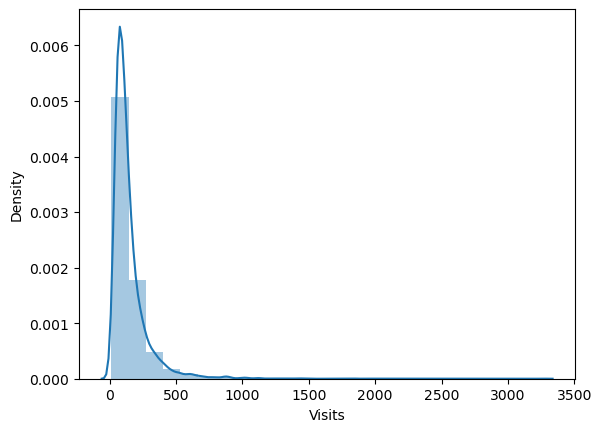

In [19]:
#Cheking for Visits extreme values
sns.distplot(df1['Visits'], bins=25) # Shows extreme values

### 3. Data prep for regression analysis 

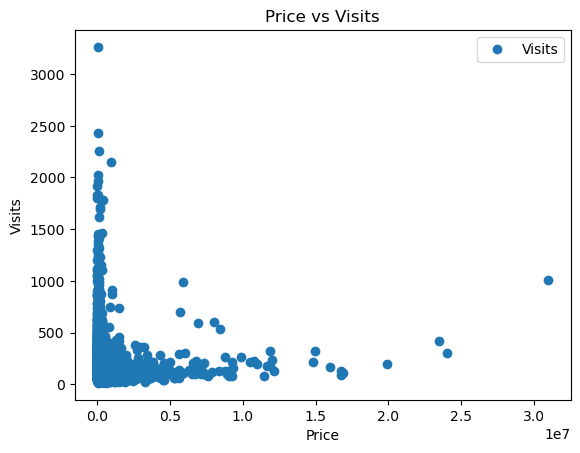

In [20]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

p1=df.plot(x = 'Price', y='Visits',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Price vs Visits')  
plt.xlabel('Price')  
plt.ylabel('Visits')  
plt.show()

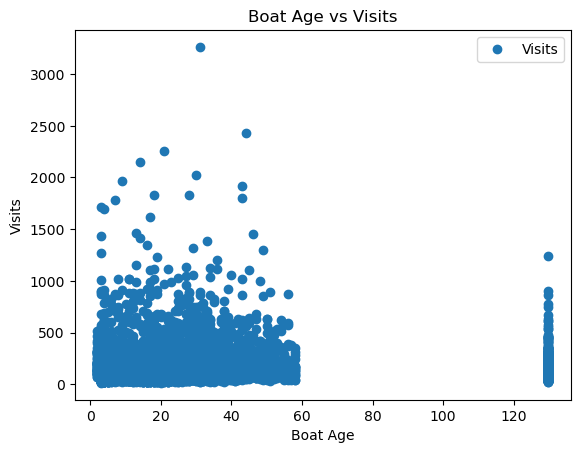

In [21]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

p2=df.plot(x = 'Boat Age', y='Visits',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Boat Age vs Visits')  
plt.xlabel('Boat Age')  
plt.ylabel('Visits')  
plt.show()

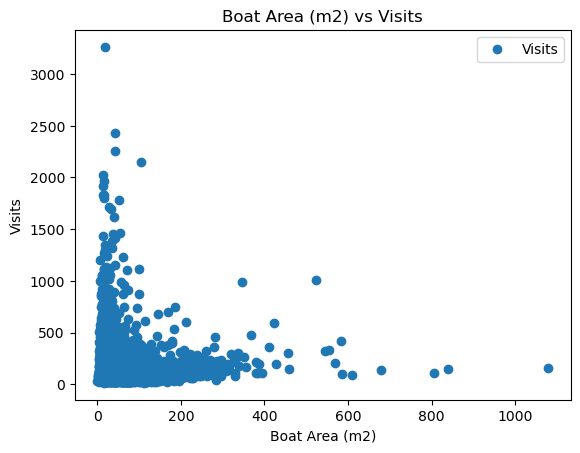

In [22]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

p3=df.plot(x = 'Boat Area (m2)', y='Visits',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Boat Area (m2) vs Visits')  
plt.xlabel('Boat Area (m2)')  
plt.ylabel('Visits')  
plt.show()

In [23]:
# Reshape the variables into NumPy arrays and put them into separate objects.
# Testing Price vs Visits
X = df1['Price'].values.reshape(-1,1)
y = df1['Visits'].values.reshape(-1,1)

In [24]:
X

array([[3537],
       [3490],
       [3996],
       ...,
       [4499],
       [4300],
       [4006]], dtype=int64)

In [25]:
y

array([[226],
       [ 75],
       [124],
       ...,
       [354],
       [266],
       [194]], dtype=int64)

In [26]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [27]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training s

In [28]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [29]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

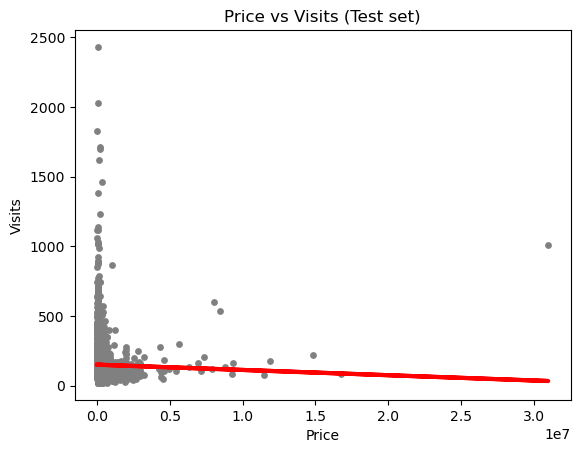

In [30]:
# Create a plot that shows the regression line from the model on the test set.
# Testing Price vs Visits
ptest1=plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Price vs Visits (Test set)')
plot_test.xlabel('Price')
plot_test.ylabel('Visits')
plot_test.show()

In [31]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [32]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-3.78028959e-06]]
Mean squared error:  24082.103550544034
R2 score:  -0.0019684540843774023


In [33]:
y_predicted

array([[149.00056182],
       [149.7169267 ],
       [149.39371194],
       ...,
       [149.82882327],
       [149.07616761],
       [149.98540287]])

In [34]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,81,149.000562
1,158,149.716927
2,56,149.393712
3,91,149.681014
4,640,149.970773
5,65,149.879804
6,530,149.747660
7,306,149.896490
8,157,149.925221
9,214,148.921176


##### Compare how the regression fits the training set

In [35]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [36]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [37]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-3.78028959e-06]]
Mean squared error:  22590.021090091566
R2 score:  0.0005880857842753828


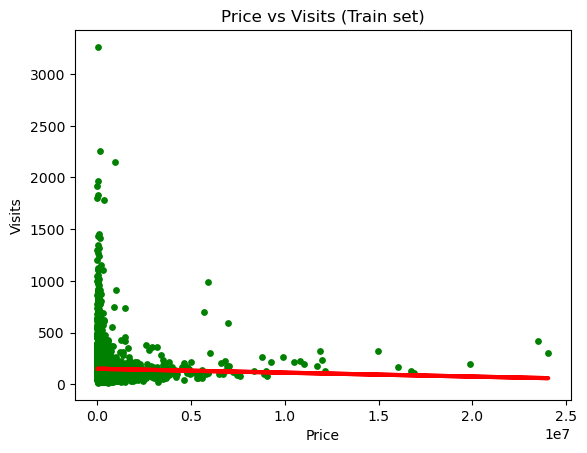

In [38]:
# Visualizing the training set results.
ptrain1=plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Price vs Visits (Train set)')
plot_test.xlabel('Price')
plot_test.ylabel('Visits')
plot_test.show()


#####  From the r2 results, the MSE and visualizations we can see that this is a very poor fit model.

In [39]:
### Bonus: performance improvement after removing outliers

In [40]:
# Clean the extreme values from the "Price per Unit" variable observed during the consistency checks.
# Chose extremelow value of 500 visits, risking leaving a lot of data values off, just to see if improves the model
df_test = df[df['Visits'] <=500] 

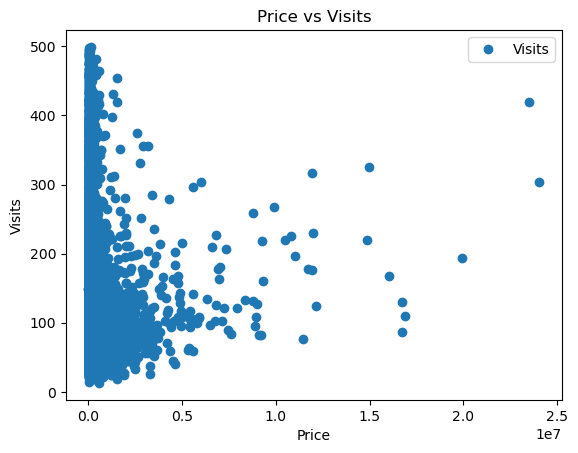

In [41]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'Price', y='Visits', style='o')  
plt.title('Price vs Visits')  
plt.xlabel('Price')  
plt.ylabel('Visits')  
plt.show()

In [42]:
# Reshape again.

X_2 = df_test['Price'].values.reshape(-1,1)
y_2 = df_test['Visits'].values.reshape(-1,1)

In [43]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [44]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [45]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [46]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [47]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-1.23314856e-06]]
Mean squared error:  7967.376418746321
R2 score:  0.001073139902530107


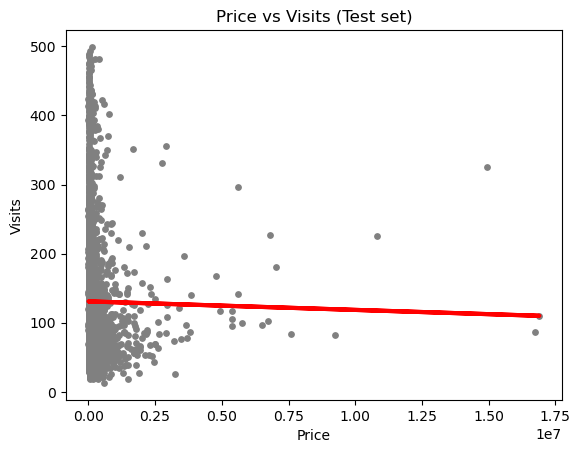

In [48]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Price vs Visits (Test set)')
plot_test.xlabel('Price')
plot_test.ylabel('Visits')
plot_test.show()

#####  From the r2 results, the MSE and visualizations we can see that there is still no improvement, so defenitly not a fit model.
##### A few reasons that might explain this occurence could be some human bias, in colecting and entering data; we also unfortunatley do not have the data to know wich viewers bought/rented boats, and which ones just  randomly scroll the website

In [49]:
# Testing Boat Age vs Visits
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df1['Boat Age'].values.reshape(-1,1)
y = df1['Visits'].values.reshape(-1,1)

In [50]:
X

array([[  6.        ],
       [  3.        ],
       [129.80723744],
       ...,
       [  3.        ],
       [  5.        ],
       [  4.        ]])

In [51]:
y

array([[226],
       [ 75],
       [124],
       ...,
       [354],
       [266],
       [194]], dtype=int64)

In [52]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [53]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [54]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [55]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

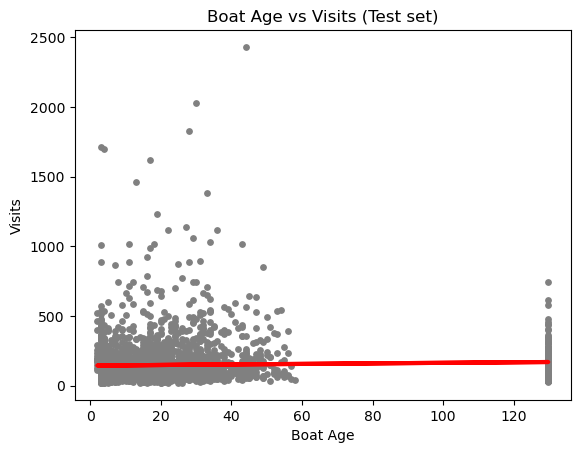

In [56]:
# Create a plot that shows the regression line from the model on the test set.

ptest2=plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Boat Age vs Visits (Test set)')
plot_test.xlabel('Boat Age')
plot_test.ylabel('Visits')
plot_test.show()

In [57]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [58]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.1944648]]
Mean squared error:  24030.885891103473
R2 score:  0.00016252583370868212


In [59]:
y_predicted

array([[144.86824244],
       [152.25790491],
       [146.61842565],
       ...,
       [152.25790491],
       [146.61842565],
       [151.8689753 ]])

In [60]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,81,144.868242
1,158,152.257905
2,56,146.618426
3,91,147.590750
4,640,152.646835
5,65,144.479313
6,530,153.035764
7,306,152.841299
8,157,169.138857
9,214,146.618426


In [61]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.1944648]]
Mean squared error:  24030.885891103473
R2 score:  0.00016252583370868212


#####  From the r2 results, the MSE and visualizations we can see that there is still no improvement, so defenitly not a fit model.

In [62]:
# Testing Boat Area vs Visits
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df1['Boat Area (m2)'].values.reshape(-1,1)
y = df1['Visits'].values.reshape(-1,1)

In [63]:
X

array([[7.6 ],
       [6.  ],
       [5.24],
       ...,
       [7.92],
       [8.26],
       [5.76]])

In [64]:
y

array([[226],
       [ 75],
       [124],
       ...,
       [354],
       [266],
       [194]], dtype=int64)

In [65]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [66]:
# Create a regression object.

regression = LinearRegression() 

In [67]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [68]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

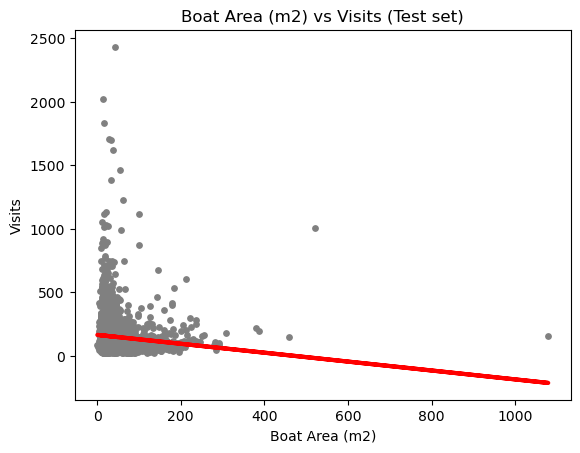

In [70]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Boat Area (m2) vs Visits (Test set)')
plot_test.xlabel('Boat Area (m2)')
plot_test.ylabel('Visits')
plot_test.show()

In [71]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [72]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.35071709]]
Mean squared error:  23869.310440386642
R2 score:  0.0068850907555372265


In [73]:
y_predicted

array([[149.77763086],
       [150.31072084],
       [150.99461917],
       ...,
       [148.5781784 ],
       [146.57207662],
       [161.07422844]])

In [74]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,81,149.777631
1,158,150.310721
2,56,150.994619
3,91,153.148022
4,640,158.363185
5,65,158.706888
6,530,147.361190
7,306,160.004541
8,157,160.621803
9,214,143.036848


In [76]:
##### Compare how the regression fits the training set
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [77]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [78]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.35071709]]
Mean squared error:  22322.29971275523
R2 score:  0.012432427723271577


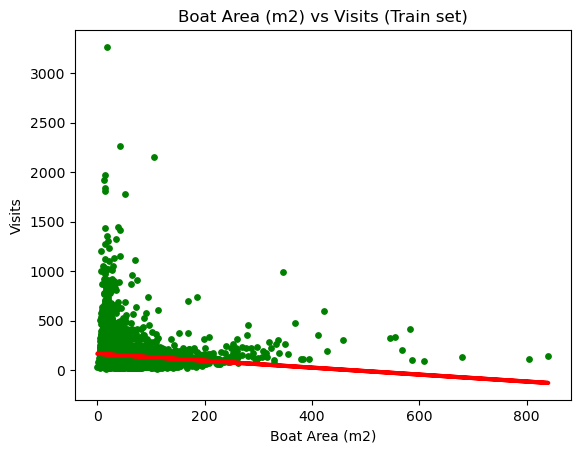

In [79]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Boat Area (m2) vs Visits (Train set)')
plot_test.xlabel('Boat Area (m2)')
plot_test.ylabel('Visits')
plot_test.show()

#####  Once again from the r2 results, the MSE and visualizations we can see that this is a not a fit model.

##### Reflections:
##### In light of these results one can affirm that on one hand the linear regression model was not a good fit and there is no relationship between these variables.
##### There are no other numerical variables left to test with the variable Visits, only the categorical  variables remain, and there is no other way to obtain more numerical variables to test from this specific data set ( Boat Age and Boat Area were the only new ones)
##### Caterigorical data relastionship analysis is beyond the scope of this task, so no other hyphotese were formulated.